In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving Stock_Data.csv to Stock_Data.csv


In [4]:
#no 1
data = pd.read_csv('Stock_Data.csv')
data.head()

,Stock Name,Symbol,Shares,Purchase Price,Cost Basis,Current Price,Market Value,Gain/Loss,Dividend/share,Annual Yield
0,Apple,AAPL,100,$90.00,"$9,000.00",$144.13,"$14,413.27","$14,269.14",$2.28,1.58%
1,Microsoft,MSFT,200,$32.00,"$6,400.00",$65.57,"$13,114.14","$13,048.57",$1.56,2.38%
2,Salesforce,CRM,150,$25.00,"$3,750.00",$82.57,"$12,385.50","$12,302.93",$0.00,0.00%
3,Oracle,ORCL,250,$50.00,"$12,500.00",$44.56,"$11,138.75","$11,094.20",$0.64,1.44%
4,Hewlett Packard Enterprise,HPE,500,$18.00,"$9,000.00",$17.69,"$8,842.50","$8,824.82",$0.26,1.47%


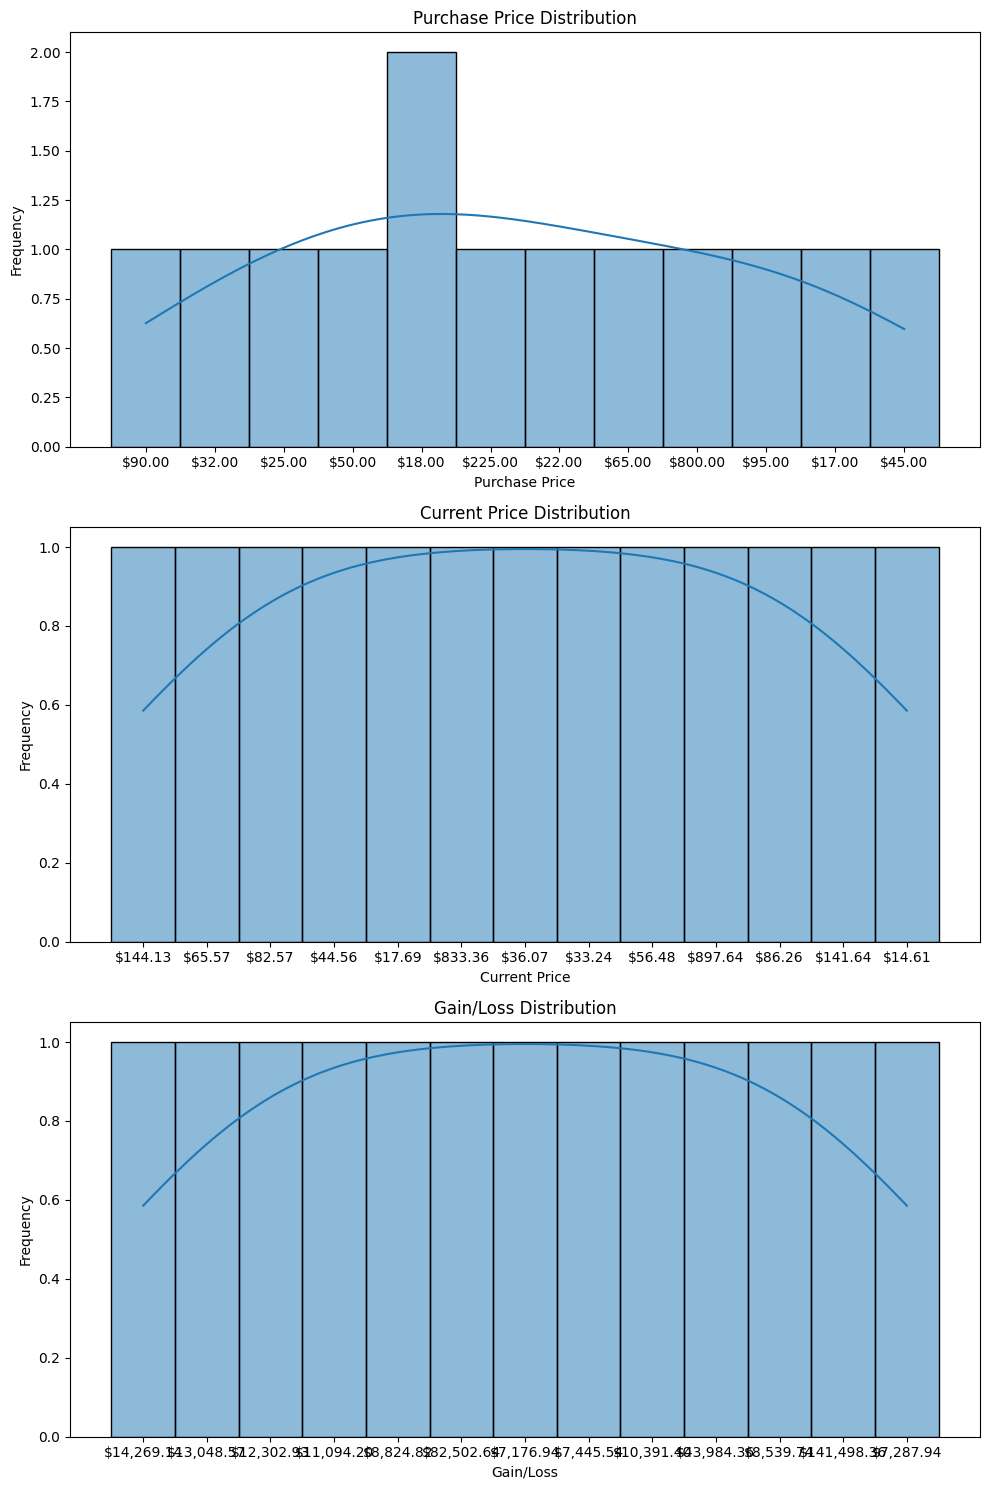

In [5]:
#no 2A
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['Purchase Price'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Purchase Price Distribution')
axes[0].set_xlabel('Purchase Price')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Current Price'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Current Price Distribution')
axes[1].set_xlabel('Current Price')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Gain/Loss'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Gain/Loss Distribution')
axes[2].set_xlabel('Gain/Loss')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-7-dfcdc233f2c9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock Name', y='Dividend/share', data=top_5_dividend, palette='viridis')


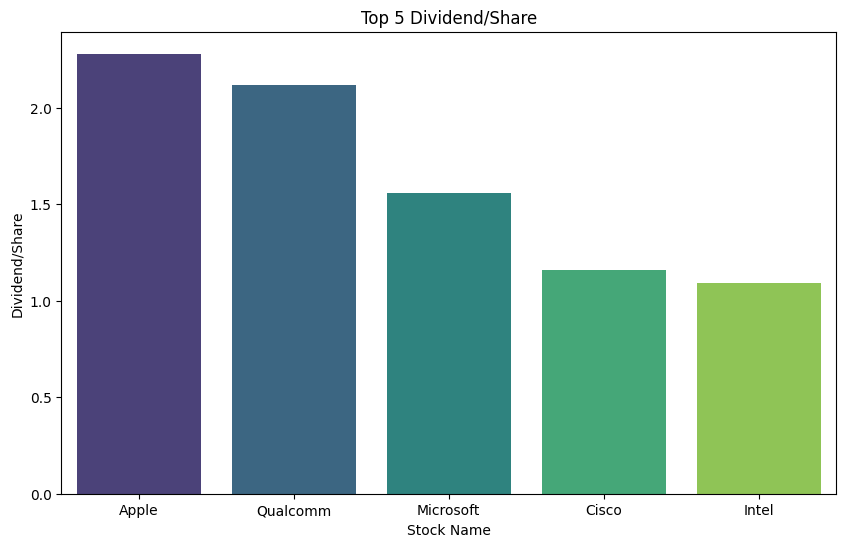

,Stock Name,Symbol,Dividend/share
0,Apple,AAPL,2.28
8,Qualcomm,QCOM,2.12
1,Microsoft,MSFT,1.56
7,Cisco,CSCO,1.16
6,Intel,INTC,1.09


In [7]:
#no 2b
# Mengonversi kolom 'Dividend/share' ke tipe data float
data['Dividend/share'] = data['Dividend/share'].replace('[$,]', '', regex=True).astype(float)

# Mendapatkan 5 saham dengan Dividen / Share tertinggi
top_5_dividend = data.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]

# Menampilkan histogram untuk top 5 Dividend/Share
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Name', y='Dividend/share', data=top_5_dividend, palette='viridis')
plt.title('Top 5 Dividend/Share')
plt.xlabel('Stock Name')
plt.ylabel('Dividend/Share')
plt.show()

# Menampilkan tabel untuk top 5 Dividend/Share
top_5_dividend


<ipython-input-15-cdc2da145607>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock Name', y='Market Value', data=top_5_market_value, palette=['#2c7bb6', '#00a6ca', '#00ccbc', '#90eb9d', '#d9ef8b'])


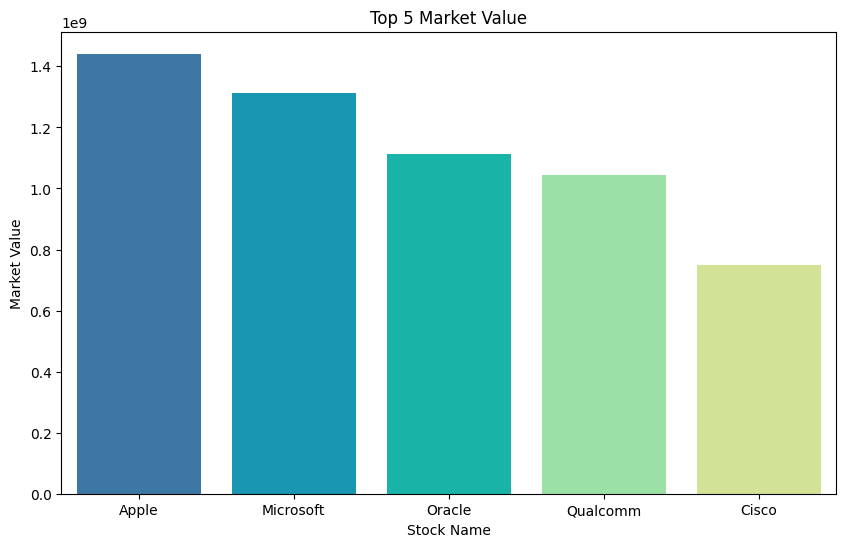

,Stock Name,Symbol,Market Value
0,Apple,AAPL,1.441327e+09
1,Microsoft,MSFT,1.311414e+09
3,Oracle,ORCL,1.113875e+09
8,Qualcomm,QCOM,1.044788e+09
7,Cisco,CSCO,7.478780e+08


In [15]:
#no 2c
# Pastikan kolom 'Market Value' berisi nilai string
data['Market Value'] = data['Market Value'].astype(str)

# Membersihkan data dengan menghapus tanda titik yang tidak sesuai
data['Market Value'] = data['Market Value'].str.replace('.', '', regex=False).str.replace(',', '.')

# Mengonversi kolom 'Market Value' ke tipe data float
data['Market Value'] = data['Market Value'].replace('[$,]', '', regex=True).astype(float)

# Mendapatkan 5 saham dengan Market Value tertinggi
top_5_market_value = data.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]

# Menampilkan histogram untuk top 5 Market Value
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Name', y='Market Value', data=top_5_market_value, palette=['#2c7bb6', '#00a6ca', '#00ccbc', '#90eb9d', '#d9ef8b'])
plt.title('Top 5 Market Value')
plt.xlabel('Stock Name')
plt.ylabel('Market Value')
plt.show()

# Menampilkan tabel untuk top 5 Market Value
top_5_market_value

<ipython-input-16-6084a44e9f12>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock Name', y='Annual Yield', data=top_7_annual_yield, palette='viridis')


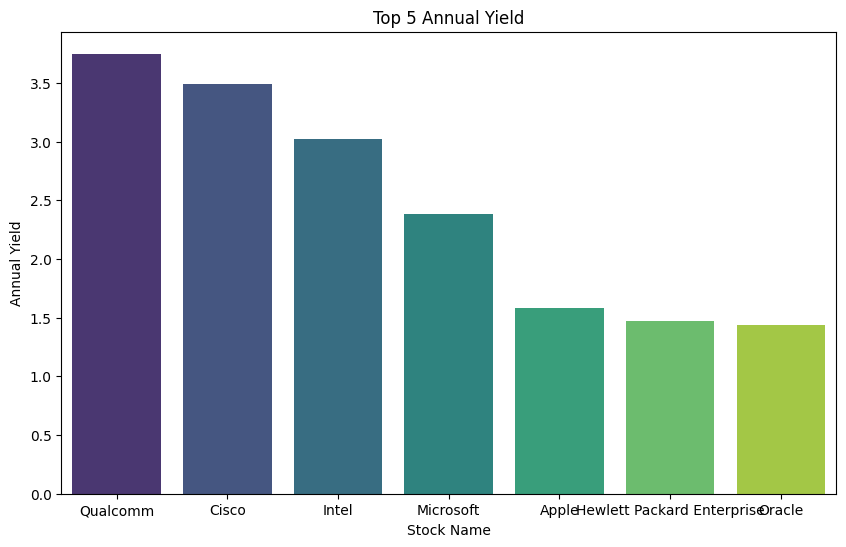

,Stock Name,Symbol,Annual Yield
8,Qualcomm,QCOM,3.75
7,Cisco,CSCO,3.49
6,Intel,INTC,3.02
1,Microsoft,MSFT,2.38
0,Apple,AAPL,1.58
4,Hewlett Packard Enterprise,HPE,1.47
3,Oracle,ORCL,1.44


In [16]:
# no 2d

# Menghapus simbol persen jika ada dan mengonversi kolom 'Annual Yield' ke tipe data float
data['Annual Yield'] = data['Annual Yield'].replace('[\%,]', '', regex=True).astype(float)

# Mendapatkan 7 saham dengan Annual Yield tertinggi
top_7_annual_yield = data.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]

# Menampilkan histogram untuk top 7 Annual Yield
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Name', y='Annual Yield', data=top_7_annual_yield, palette='viridis')
plt.title('Top 5 Annual Yield')
plt.xlabel('Stock Name')
plt.ylabel('Annual Yield')
plt.show()

# Menampilkan tabel untuk top 7 Annual Yield
top_7_annual_yield